# Exploratory Data Analysis - Maverik

#1. Business Problem Statement

A retail convenience chain, Maverik, fuels adventures in more than 380 locations across 12 western states. Maverik is known for premium BonFire food, diesel and unleaded fuel, and in-store merchandise. The company is on an expansion spree and as part of its growth, it recently acquired “ Kum & Go” nearly doubling its store count.

The company is planning to open 30 new stores yearly in a new market, and it needs to forecast daily sales for the new store. In this context, the company faces a crucial business challenge related to financial planning and return on investment (ROI) assessment for these new stores. The challenge lies in predicting the first-year sales for these newly acquired stores accurately. Maverik recognizes that accurate sales forecasts are essential for informed decision-making in terms of effective financial planning, staffing, inventory, and marketing as the company continues to grow.

We will be using historical data provided by Maverik to predict daily sales for upcoming new stores for the first year, considering, the seasonality and multiple sales metrics. This data includes daily sales, as well as information such as the stores' demographics, product mix, and sales by product category.  

The goal is to develop a sales forecasting model that can accurately predict daily sales for the new store. We will be using a variety of forecasting methods, such as time series analysis, regression analysis, causal analysis, and machine learning. The model will be evaluated by comparing its prediction to actual sales data from a holdout dataset. The model performance will be evaluated using industry-standard metrics such as Forecast Accuracy Metrics (e.g. MAE, MAPE, RMSE) and its ability to update forecasts dynamically in response to new data. The company needs to forecast daily sales for the new store to make informed decisions about staffing, inventory, and marketing. This can help the company to maximize its profits and minimize its losses while maintaining customer satisfaction.

As noted, this project is focused on prediction of the future sales. Therefore, we will not be including any analysis of the customer demographics and operational analysis(e.g. Staffing and inventory management) which are considered out of scope for the current project.

Bhakti Dahal, Venkatachalam Kapuganti, Tarun Gulati, and Anjan Kumar will be leading this analytics project. We anticipate having results ready for review by Maverik on November 5, 2023. The final project deliverable will be on November 29, 2023.


#2. Data Import and Understanding

##2.1 Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Defining the path to the Maverick folder
maverick_folder_path = '/content/drive/MyDrive/Final Capstone - MSBA/Maverik/'

# CSV files loading
qualitative_data = pd.read_csv(f'{maverick_folder_path}/qualitative_data_msba.csv')
time_series_data = pd.read_csv(f'{maverick_folder_path}/time_series_data_msba.csv')

# Excel file loading
feature_dictionary = pd.read_excel(f'{maverick_folder_path}/MSBA Feature Dictionary.xlsx')

##2.2 Data Understanding (time_series_data)

In [ ]:
print(time_series_data.shape)


(13908, 12)


In [ ]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13908 non-null  int64  
 1   capital_projects.soft_opening_date  13908 non-null  object 
 2   calendar.calendar_day_date          13908 non-null  object 
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 4   calendar.day_of_week                13908 non-null  object 
 5   calendar_information.holiday        13908 non-null  object 
 6   calendar_information.type_of_day    13908 non-null  object 
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64
 9   diesel                              13908 non-null  float64
 10  unleaded                            13908 non-null  float64
 11  site_id_msba                        13908

It can be depicted that, there are no null values in time series data. There are four target variables.

1. daily_yoy_ndt.total_inside_sales - Inside Sales
2. daily_yoy_ndt.total_food_service  - Food Service Sales
3. diesel - Diesel Gallons Sold
4. unleaded - All Non-diesel Sold

In [ ]:
time_series_data.head(10)

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535
5,6,2022-06-14,2022-06-30,26,Thursday,NONE,WEEKDAY,2377.8965,878.6750,966.6860,1890.6510,24535
6,7,2022-06-14,2022-07-01,27,Friday,NONE,WEEKDAY,2696.2250,943.3095,894.9325,2202.2665,24535
7,8,2022-06-14,2022-07-04,27,Monday,Independence Day,WEEKDAY,2100.8750,686.1155,539.8400,1337.3815,24535
8,9,2022-06-14,2022-07-06,27,Wednesday,NONE,WEEKDAY,2402.5610,872.0180,994.6825,1993.9115,24535
9,10,2022-06-14,2022-07-08,28,Friday,NONE,WEEKDAY,2777.7190,1004.1465,1231.6675,2461.2700,24535


In [ ]:
time_series_data.describe()

,Unnamed: 0,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,6954.500000,26.501079,2846.537988,759.922326,1702.585227,2382.091588,23041.052632
std,4015.038107,14.998715,981.299870,341.578220,2161.208192,1025.518658,710.634218
min,1.000000,1.000000,0.000000,0.000000,0.000000,240.180500,21560.000000
25%,3477.750000,14.000000,2181.156250,521.087875,383.062750,1654.149000,22540.000000
50%,6954.500000,26.000000,2693.976250,697.434500,1018.920000,2256.677500,22907.500000
75%,10431.250000,39.000000,3325.306250,924.282625,2283.297625,2928.254000,23555.000000
max,13908.000000,52.000000,7172.466000,2531.662000,20853.952000,8077.233500,24535.000000


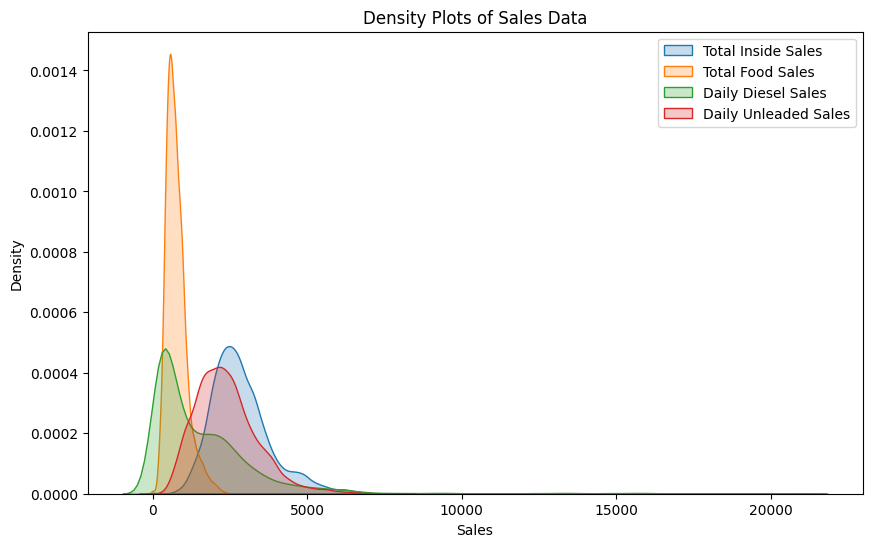

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(time_series_data['daily_yoy_ndt.total_inside_sales'], label='Total Inside Sales', shade=True)
sns.kdeplot(time_series_data['daily_yoy_ndt.total_food_service'], label='Total Food Sales', shade=True)
sns.kdeplot(time_series_data['diesel'], label='Daily Diesel Sales', shade=True)
sns.kdeplot(time_series_data['unleaded'], label='Daily Unleaded Sales', shade=True)

plt.title('Density Plots of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()


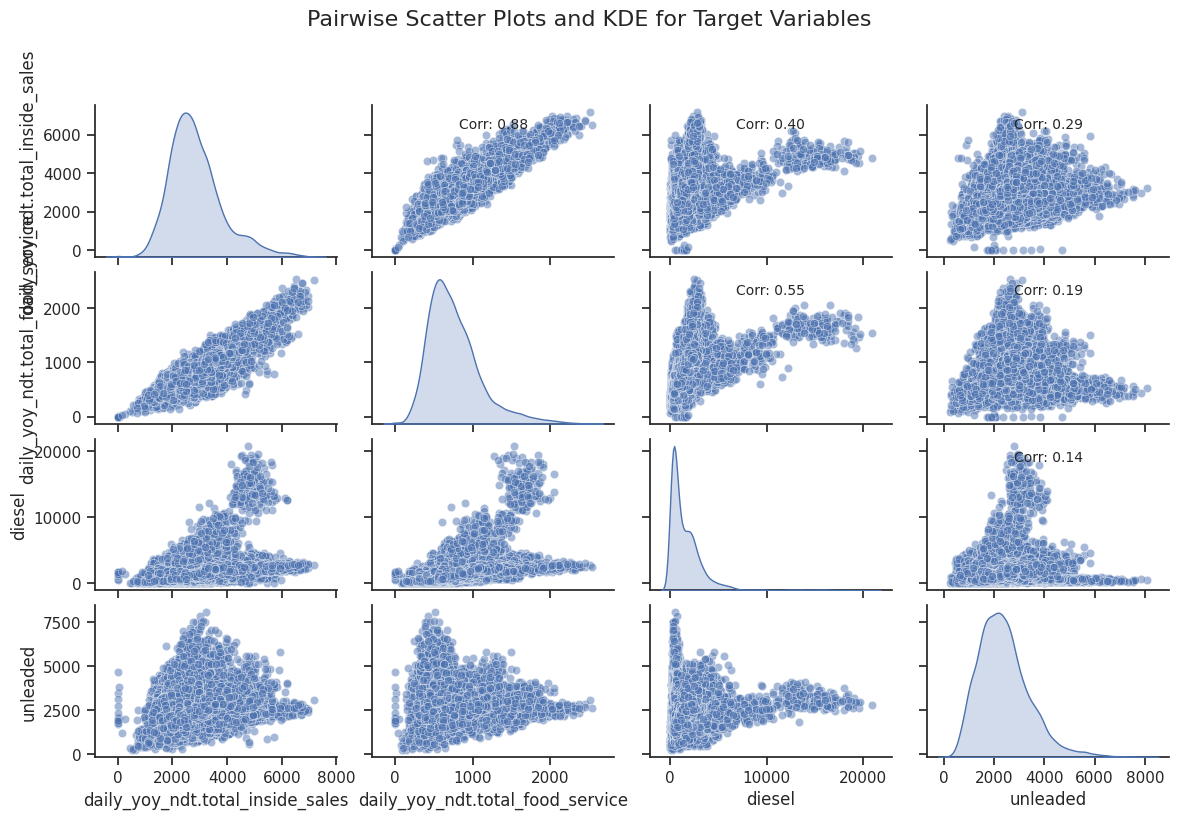

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Columns selection
sales_columns = time_series_data[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']]

# Pairplot with Seaborn
sns.set(style="ticks")
pairplot = sns.pairplot(sales_columns, height=2, aspect=1.5, diag_kind='kde', plot_kws={'alpha': 0.5})

pairplot.fig.suptitle('Pairwise Scatter Plots and KDE for Target Variables', y=1.02, fontsize=16)
pairplot.fig.subplots_adjust(top=0.9)

corr_matrix = sales_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        coef = corr_matrix.iloc[i, j]
        pairplot.axes[i, j].annotate(f"Corr: {coef:.2f}", (0.5, 0.85), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

1. Strong Positive Coorelation - inside_sales & food_service (0.88)
2. Weak Positive Coorelation - diesel & unleaded (0.14)
3. Negative Coorelation - There is no negative relation between the  target variables.


##2.3 Data Understanding (qualitative_data)

In [ ]:
print(qualitative_data.shape)

(37, 55)


In [ ]:
qualitative_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


The qualitative data has null values pertaining to lanes.

In [ ]:
qualitative_data.head()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [ ]:
qualitative_data.describe()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,...,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
count,37.000000,37.000000,37.00000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,2021.324324,4970.27027,2.0,1.648649,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,...,14.270270,2.513514,3.324324,3.324324,2.513514,2.378378,2.351351,4.648649,1.702703,23040.405405
std,10.824355,0.474579,575.93121,0.0,0.483978,5.918237,5694.011350,4697.168291,24333.027254,1915.140476,...,3.948619,2.049683,2.925501,2.925501,2.049683,0.923500,0.856875,1.751447,0.740303,730.069801
min,1.000000,2021.000000,2933.00000,2.0,1.000000,23.000000,0.000000,56.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21560.000000
25%,10.000000,2021.000000,5046.00000,2.0,1.000000,34.000000,1984.000000,1771.000000,39538.000000,262.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,22540.000000
50%,19.000000,2021.000000,5046.00000,2.0,2.000000,38.000000,5574.000000,3895.000000,46356.000000,1003.000000,...,12.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000,22890.000000
75%,28.000000,2022.000000,5046.00000,2.0,2.000000,41.000000,11269.000000,6002.000000,73519.000000,2686.000000,...,16.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,6.000000,2.000000,23555.000000
max,37.000000,2022.000000,6134.00000,2.0,2.000000,49.000000,18692.000000,26077.000000,110957.000000,5923.000000,...,24.000000,6.000000,9.000000,9.000000,6.000000,5.000000,5.000000,10.000000,4.000000,24535.000000


#3 Data Cleaning & EDA

##3.1 Time_series_data

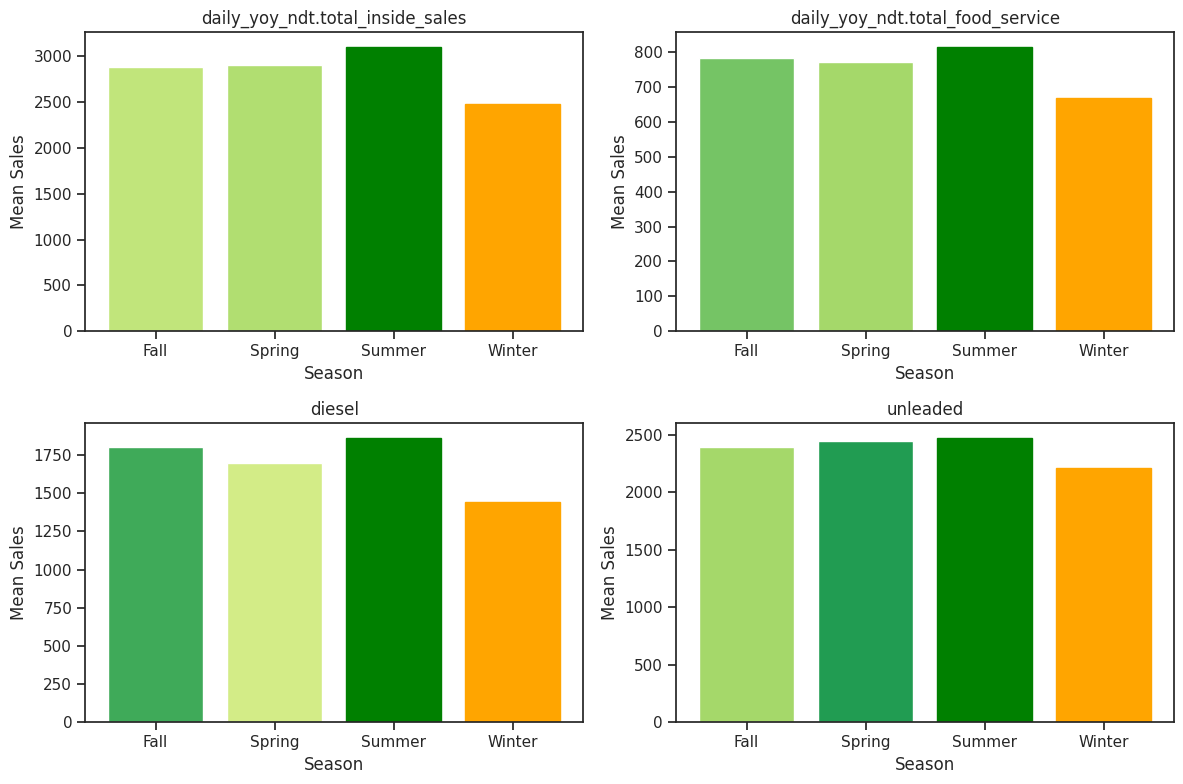

In [ ]:
# Convertion of the date column to datetime
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

def categorize_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

time_series_data['Season'] = time_series_data['calendar.calendar_day_date'].apply(categorize_season)

# List of target variables
target_variables = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

tallest_clusters = {}

plt.figure(figsize=(12, 8))

for i, target_variable in enumerate(target_variables):
    plt.subplot(2, 2, i + 1)
    ax = plt.gca()

    # Grouping the data by season and calculate the mean sales for each season
    grouped_data = time_series_data.groupby(['Season'])[target_variable].mean()

    # Finding the highest and lowest values
    highest_season = grouped_data.idxmax()
    lowest_season = grouped_data.idxmin()

    tallest_clusters[target_variable] = highest_season

    # Creating a custom color map
    cmap = plt.cm.get_cmap('RdYlGn')
    norm = plt.Normalize(grouped_data.min(), grouped_data.max())
    colors = cmap(norm(grouped_data.values))

    # Creating a bar plot with custom colors
    x = np.arange(len(grouped_data))
    bars = plt.bar(x, grouped_data, color=colors)

    # Coloring the bars for highest and lowest values
    bars[x[grouped_data.index == highest_season][0]].set_color('green')
    bars[x[grouped_data.index == lowest_season][0]].set_color('orange')

    plt.title(target_variable)
    plt.xlabel('Season')
    plt.ylabel('Mean Sales')
    plt.xticks(x, grouped_data.index)

plt.tight_layout()
plt.show()

The bar plot interprets the peformance of the target variables across the seasons. (Fall, Spring, Summer & Winter). It can be clearly depicted that, Summer has highest sales and winter has lowes sales for all the target variables, which were highlighted accordingly. Fall & Spring performanace was slightly outperformed by Summer.


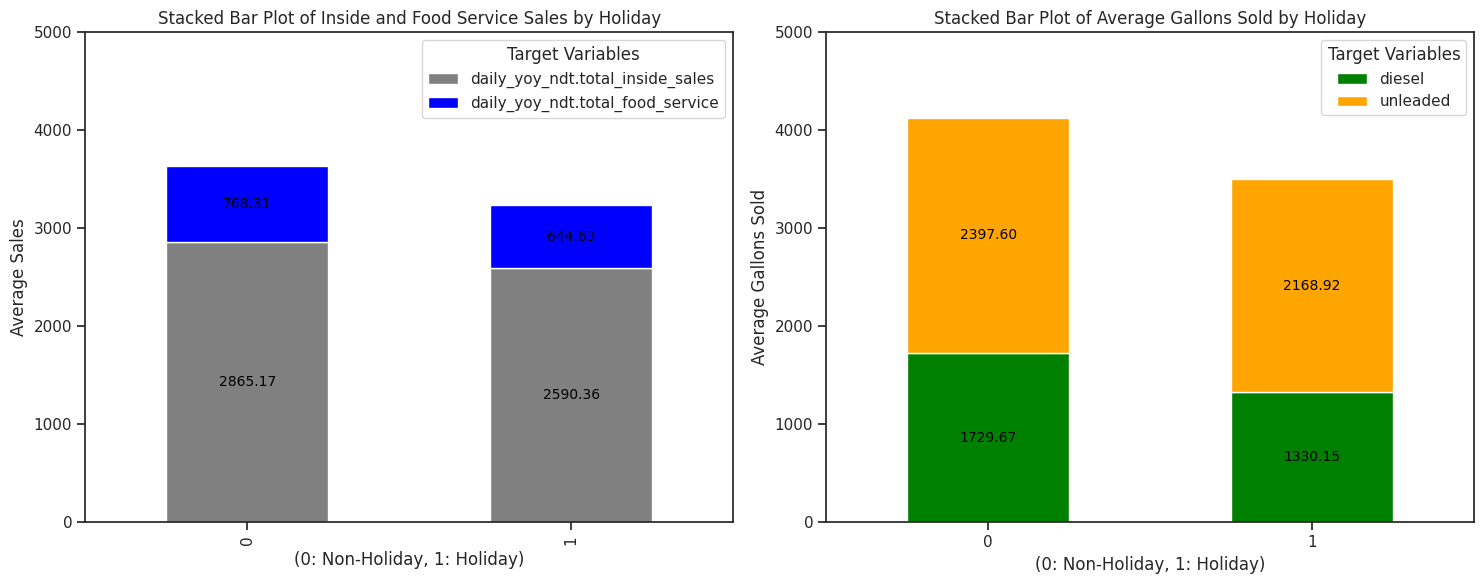

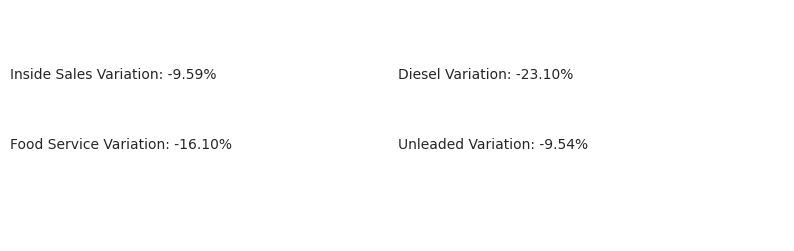

In [ ]:
# New binary column 'is_holiday' (1 for holidays, 0 for non-holidays)
time_series_data['is_holiday'] = time_series_data['calendar_information.holiday'].apply(lambda x: 1 if x != 'NONE' else 0)

grouped = time_series_data.groupby('is_holiday')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].mean()

colors = ['grey', 'blue', 'green', 'orange']

# Creation of two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Inside Sales and Food Service
ax1 = axes[0]
bars1 = grouped[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].plot(kind='bar', stacked=True, ax=ax1, color=colors[:2])
ax1.set_xlabel('(0: Non-Holiday, 1: Holiday)')
ax1.set_ylabel('Average Sales')
ax1.set_title('Stacked Bar Plot of Inside and Food Service Sales by Holiday')
ax1.legend(title='Target Variables', loc='upper right')
ax1.set_ylim(0, 5000)

# Plot for Diesel and Unleaded
ax2 = axes[1]
bars2 = grouped[['diesel', 'unleaded']].plot(kind='bar', stacked=True, ax=ax2, color=colors[2:])
ax2.set_xlabel('(0: Non-Holiday, 1: Holiday)')
ax2.set_ylabel('Average Gallons Sold')
ax2.set_title('Stacked Bar Plot of Average Gallons Sold by Holiday')
ax2.legend(title='Target Variables', loc='upper right')
ax2.set_ylim(0, 5000)

plt.xticks(rotation=0)
plt.tight_layout()

for ax in axes:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 0:
            ax.annotate(f'{height:.2f}', (p.get_x() + width / 2, p.get_y() + height / 2), ha='center', va='center', fontsize=10, color='black')

# Calculation of percentage variation for each target variable
percentage_variations = {}
for col in ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']:
    variation = ((grouped.loc[1, col] - grouped.loc[0, col]) / grouped.loc[0, col]) * 100
    percentage_variations[col] = variation

# Displaying percentage variation
plt.figure(figsize=(10, 3))
plt.text(0, 0.7, f'Inside Sales Variation: {percentage_variations["daily_yoy_ndt.total_inside_sales"]:.2f}%', fontsize=10, ha='left')
plt.text(0, 0.4, f'Food Service Variation: {percentage_variations["daily_yoy_ndt.total_food_service"]:.2f}%', fontsize=10, ha='left')
plt.text(0.5, 0.7, f'Diesel Variation: {percentage_variations["diesel"]:.2f}%', fontsize=10, ha='left')
plt.text(0.5, 0.4, f'Unleaded Variation: {percentage_variations["unleaded"]:.2f}%', fontsize=10, ha='left')
plt.axis('off')

plt.show()

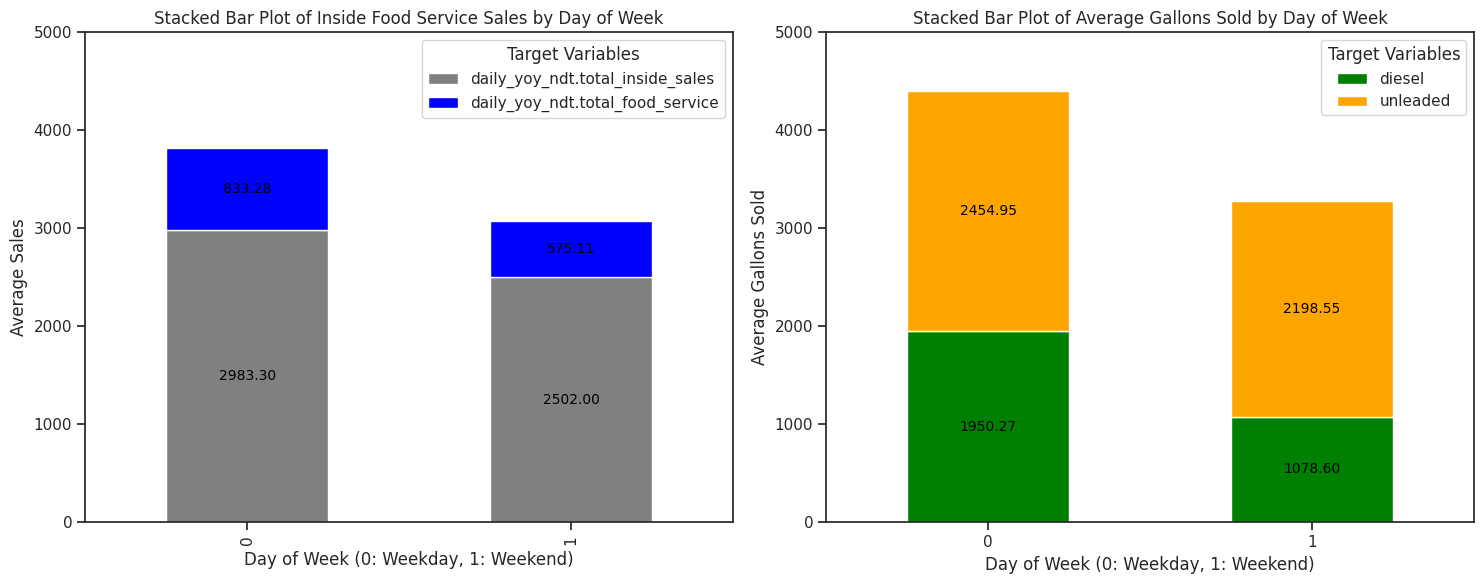

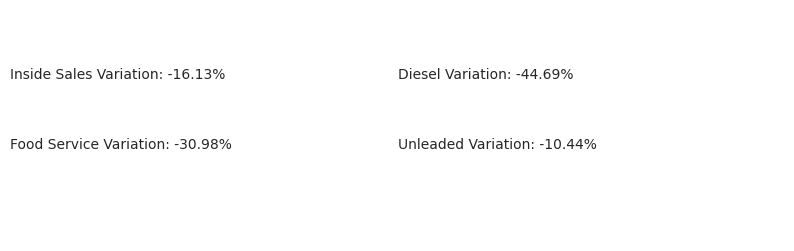

In [ ]:
# New binary column 'is_weekend' (1 for weekends, 0 for weekdays)
time_series_data['is_weekend'] = time_series_data['calendar_information.type_of_day'].apply(lambda x: 1 if x in ['WEEKEND'] else 0)

# Grouping of the DataFrame by 'is_weekend' and calculate the average of each target variable
grouped = time_series_data.groupby('is_weekend')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].mean()

# Define custom colors for the four target variables
colors = ['grey', 'blue', 'green', 'orange']

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Inside Sales and Food Service
ax1 = axes[0]
bars1 = grouped[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].plot(kind='bar', stacked=True, ax=ax1, color=colors[:2])
ax1.set_xlabel('Day of Week (0: Weekday, 1: Weekend)')
ax1.set_ylabel('Average Sales')
ax1.set_title('Stacked Bar Plot of Inside Food Service Sales by Day of Week')
ax1.legend(title='Target Variables', loc='upper right')
ax1.set_ylim(0, 5000)

# Plot for Diesel and Unleaded
ax2 = axes[1]
bars2 = grouped[['diesel', 'unleaded']].plot(kind='bar', stacked=True, ax=ax2, color=colors[2:])
ax2.set_xlabel('Day of Week (0: Weekday, 1: Weekend)')
ax2.set_ylabel('Average Gallons Sold')
ax2.set_title('Stacked Bar Plot of Average Gallons Sold by Day of Week')
ax2.legend(title='Target Variables', loc='upper right')
ax2.set_ylim(0, 5000)

plt.xticks(rotation=0)
plt.tight_layout()

for ax in axes:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 0:
            ax.annotate(f'{height:.2f}', (p.get_x() + width / 2, p.get_y() + height / 2), ha='center', va='center', fontsize=10, color='black')

# Calculation of percentage variation for each target variable
percentage_variations = {}
for col in ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']:
    variation = ((grouped.loc[1, col] - grouped.loc[0, col]) / grouped.loc[0, col]) * 100
    percentage_variations[col] = variation

# Displaying percentage variation
plt.figure(figsize=(10, 3))
plt.text(0, 0.7, f'Inside Sales Variation: {percentage_variations["daily_yoy_ndt.total_inside_sales"]:.2f}%', fontsize=10, ha='left')
plt.text(0, 0.4, f'Food Service Variation: {percentage_variations["daily_yoy_ndt.total_food_service"]:.2f}%', fontsize=10, ha='left')
plt.text(0.5, 0.7, f'Diesel Variation: {percentage_variations["diesel"]:.2f}%', fontsize=10, ha='left')
plt.text(0.5, 0.4, f'Unleaded Variation: {percentage_variations["unleaded"]:.2f}%', fontsize=10, ha='left')
plt.axis('off')

plt.show()

In [ ]:
unique_site_ids = time_series_data['site_id_msba'].unique()
print(unique_site_ids)

[24535 24255 24220 24150 23905 23835 23765 23730 23660 23555 23485 23450
 23415 23380 23345 23240 23135 23065 22925 22890 22855 22820 22785 22750
 22715 22680 22645 22575 22540 22505 22400 22330 22260 22120 22085 22015
 21980 21560]


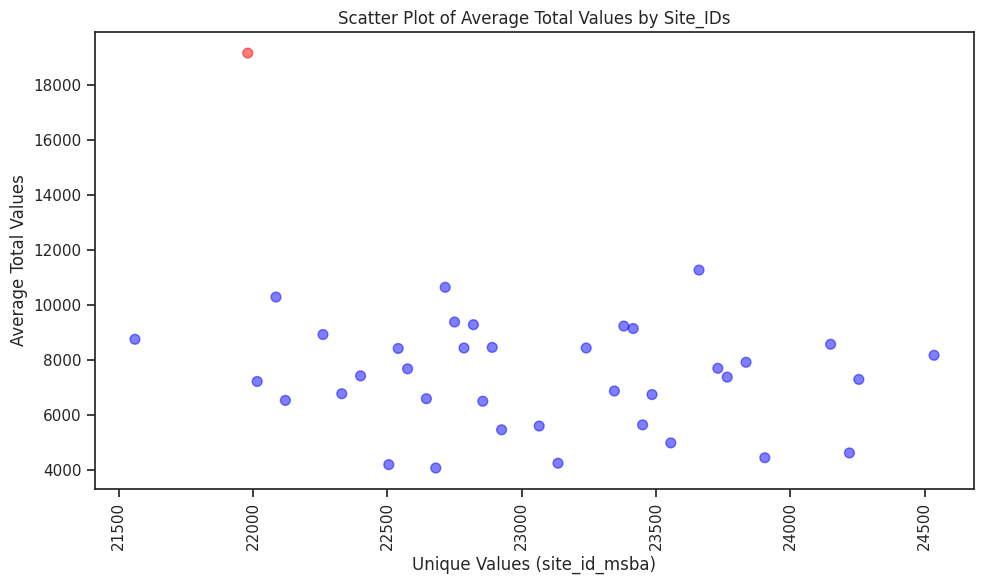

In [ ]:
# Total sales for each row by summing the sales columns
time_series_data['total_value'] = time_series_data[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum(axis=1)

# Grouping the data by the unique values in the 'site_id_msba' column
grouped = time_series_data.groupby('site_id_msba')['total_value']

# Calculation of the average total sales for each unique value
average_sales = grouped.mean()

# Sorting the unique values based on average total sales in descending order
sorted_values = average_sales.sort_values(ascending=False)

# Calculate the Z-scores for each data point
z_scores = np.abs(stats.zscore(sorted_values))

# Set a Z-score threshold for highlighting outliers (e.g., Z-score > 2)
z_score_threshold = 2

# Identifying outliers
outliers = z_scores > z_score_threshold

# Scatter plot of the average total sales
plt.figure(figsize=(10, 6))

# Highlighting outliers in red
plt.scatter(sorted_values.index, sorted_values.values, marker='o', s=50, alpha=0.5, color=['red' if outlier else 'blue' for outlier in outliers])
plt.xlabel('Unique Values (site_id_msba)')
plt.ylabel('Average Total Values')
plt.title('Scatter Plot of Average Total Values by Site_IDs')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

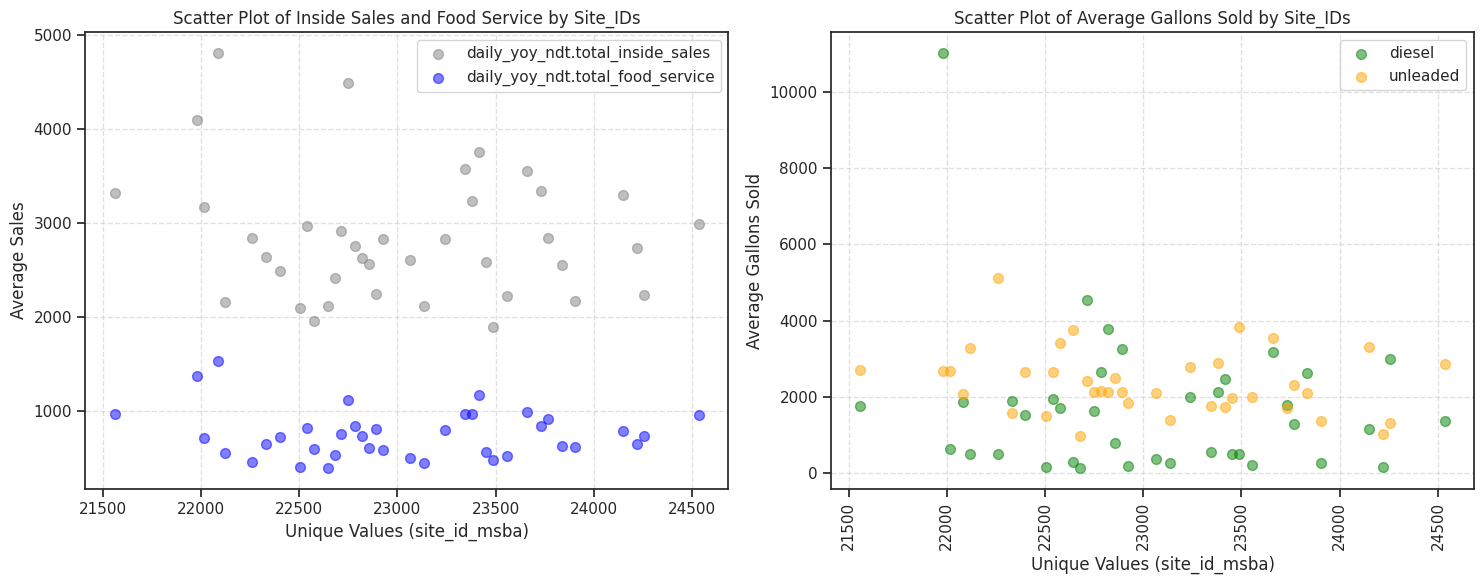

In [ ]:
# Grouping the data by the unique values in the 'site_id_msba' column
grouped = time_series_data.groupby('site_id_msba')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].mean()

# Calculate the Z-scores for each data point
z_scores = np.abs(stats.zscore(grouped))

# Set a Z-score threshold for highlighting outliers (e.g., Z-score > 2)
z_score_threshold = 2

# Identifying outliers
outliers = z_scores > z_score_threshold

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Inside Sales and Food Service
ax1 = axes[0]
sales_labels = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']
colors1 = ['grey', 'blue']

# Highlighting outliers in red
for i, label in enumerate(sales_labels):
    ax1.scatter(grouped.index, grouped[label], marker='o', s=50, alpha=0.5, color=colors1[i], label=label)

ax1.set_xlabel('Unique Values (site_id_msba)')
ax1.set_ylabel('Average Sales')
ax1.set_title('Scatter Plot of Inside Sales and Food Service by Site_IDs')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot for Diesel and Unleaded
ax2 = axes[1]
gallons_labels = ['diesel', 'unleaded']
colors2 = ['green', 'orange']

# Highlighting outliers in red
for i, label in enumerate(gallons_labels):
    ax2.scatter(grouped.index, grouped[label], marker='o', s=50, alpha=0.5, color=colors2[i], label=label)

ax2.set_xlabel('Unique Values (site_id_msba)')
ax2.set_ylabel('Average Gallons Sold')
ax2.set_title('Scatter Plot of Average Gallons Sold by Site_IDs')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [ ]:
# Total sales for each row by summing the sales columns
time_series_data['total_value'] = time_series_data[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum(axis=1)

# Grouping the data by the unique values in the 'site_id_msba' column
grouped = time_series_data.groupby('site_id_msba')['total_value']

# Calculation of the average total sales for each unique value
average_values = grouped.mean()

# Sorting the unique values based on average total sales in descending order
sorted_values = average_values.sort_values(ascending=False)

top_5_highest_sales = sorted_values.head(5)
bottom_5_least_sales = sorted_values.tail(5)

print("Top 5 Sites with Highest Average Values:")
print(top_5_highest_sales)
print("\nBottom 5 Sites with Least Average Values:")
print(bottom_5_least_sales)

Top 5 Sites with Highest Average Values:
site_id_msba
21980    19177.753268
23660    11270.820320
22715    10643.034529
22085    10288.329993
22750     9379.465150
Name: total_value, dtype: float64

Bottom 5 Sites with Least Average Values:
site_id_msba
24220    4608.065249
23905    4434.020003
23135    4234.210138
22505    4182.472975
22680    4060.643350
Name: total_value, dtype: float64


In [ ]:
# List of target variables
target_variables = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

# Creation of a dictionary to store top and bottom 5 IDs for each target variable
top_bottom_ids = {}

for target_variable in target_variables:
    # Grouping the data by the unique values in the 'site_id_msba' column
    grouped = time_series_data.groupby('site_id_msba')[target_variable]

    # Calculation of the average total sales for each unique value
    average_sales = grouped.mean()

    # Sorting the unique values based on average total sales in descending order
    sorted_values = average_sales.sort_values(ascending=False)

    # Top 5 and bottom 5 unique values
    top_5_highest_sales = sorted_values.head(5)
    bottom_5_least_sales = sorted_values.tail(5)

    # Storing the results in the dictionary
    top_bottom_ids[target_variable] = {
        'Top 5 sites with Highest Average values': top_5_highest_sales.index.tolist(),
        'Bottom 5 sites with Least Average values': bottom_5_least_sales.index.tolist()
    }

# Results
for target_variable, ids in top_bottom_ids.items():
    print(f"Target Variable: {target_variable}\n")
    for label, id_list in ids.items():
        print(f"{label}:")
        print(id_list)
        print()

Target Variable: daily_yoy_ndt.total_inside_sales

Top 5 sites with Highest Average values:
[22085, 22750, 21980, 23415, 23345]

Bottom 5 sites with Least Average values:
[23135, 22645, 22505, 22575, 23485]

Target Variable: daily_yoy_ndt.total_food_service

Top 5 sites with Highest Average values:
[22085, 21980, 23415, 22750, 23660]

Bottom 5 sites with Least Average values:
[23485, 22260, 23135, 22505, 22645]

Target Variable: diesel

Top 5 sites with Highest Average values:
[21980, 22715, 22820, 22890, 23660]

Bottom 5 sites with Least Average values:
[23555, 22925, 24220, 22505, 22680]

Target Variable: unleaded

Top 5 sites with Highest Average values:
[22260, 23485, 22645, 23660, 22575]

Bottom 5 sites with Least Average values:
[23135, 23905, 24255, 24220, 22680]



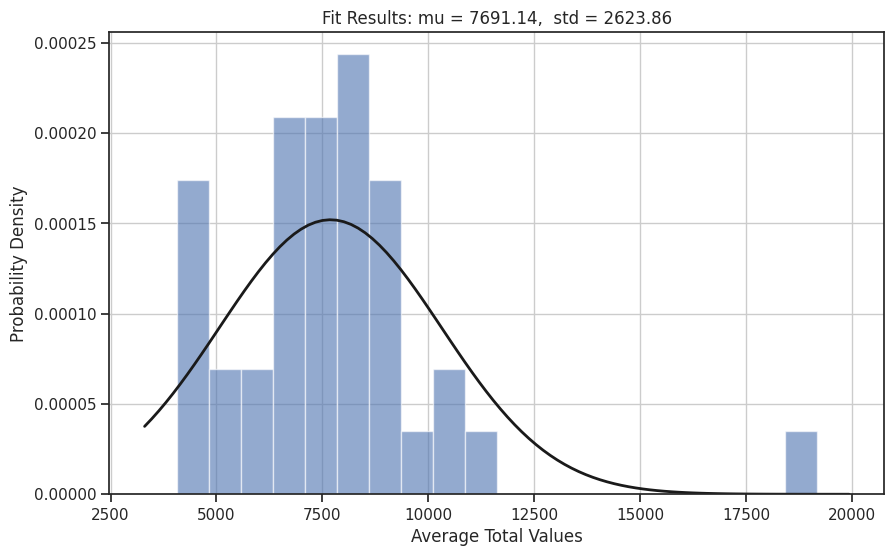

In [ ]:
import scipy.stats as stats

# Calculation of the total sales for each row by summing the sales columns
time_series_data['total_value'] = time_series_data[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum(axis=1)

# Grouping the data by the unique values in the 'site_id_msba' column
grouped = time_series_data.groupby('site_id_msba')['total_value']

# Calculation of the average total sales for each unique value
average_values = grouped.mean()

# Normal distribution to the average total sales
mu, std = stats.norm.fit(average_values)

# Histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(average_values, bins=20, density=True, alpha=0.6, color='b')

# Probability density function of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Plotting
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Average Total Values')
plt.ylabel('Probability Density')
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.grid(True)
plt.show()

In [ ]:
time_series_data_copy = time_series_data.copy()

# Group by 'site_id_msba' and calculation of the average for each group
time_series_data_copy['avg_inside_sales'] = time_series_data_copy.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].transform('mean')
time_series_data_copy['avg_food_service'] = time_series_data_copy.groupby('site_id_msba')['daily_yoy_ndt.total_food_service'].transform('mean')
time_series_data_copy['avg_diesel'] = time_series_data_copy.groupby('site_id_msba')['diesel'].transform('mean')
time_series_data_copy['avg_unleaded'] = time_series_data_copy.groupby('site_id_msba')['unleaded'].transform('mean')

time_series_data_copy.head()

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,Season,is_holiday,is_weekend,total_value,avg_inside_sales,avg_food_service,avg_diesel,avg_unleaded
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535,Summer,0,0,5177.8615,2989.652932,958.999225,1360.263582,2858.136052
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535,Summer,0,0,5026.3500,2989.652932,958.999225,1360.263582,2858.136052
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535,Summer,0,0,5714.1105,2989.652932,958.999225,1360.263582,2858.136052
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535,Summer,0,1,3772.1355,2989.652932,958.999225,1360.263582,2858.136052
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535,Summer,0,0,5161.6600,2989.652932,958.999225,1360.263582,2858.136052


In [ ]:
time_series_data_copy.shape

(13908, 20)

In [ ]:
# Columns to keep in the DataFrame
columns_to_keep = ['capital_projects.soft_opening_date', 'site_id_msba', 'avg_inside_sales', 'avg_food_service', 'avg_diesel', 'avg_unleaded']

# New DataFrame with only the specified columns
time_series_unique_rows = time_series_data_copy[columns_to_keep].copy()

# Dropping duplicate rows based on'site_id_msba'
time_series_unique_rows = time_series_unique_rows.drop_duplicates(subset=['site_id_msba'])

time_series_unique_rows.head()

,capital_projects.soft_opening_date,site_id_msba,avg_inside_sales,avg_food_service,avg_diesel,avg_unleaded
0,2022-06-14,24535,2989.652932,958.999225,1360.263582,2858.136052
366,2022-08-09,24255,2238.811014,738.824668,2997.629680,1311.932742
732,2022-07-12,24220,2741.072269,653.547331,172.700423,1040.745225
1098,2022-08-16,24150,3301.542770,791.472395,1154.947510,3321.106269
1464,2022-05-17,23905,2177.102619,623.585179,266.255223,1367.076982


In [ ]:
time_series_unique_rows.shape

(38, 6)

##3.2 Qualitative & Merged data

In [ ]:
print("\nMissing Values in Qualitative Data:")
print(qualitative_data.isnull().sum())



Missing Values in Qualitative Data:
Unnamed: 0                                  0
open_year                                   0
square_feet                                 0
front_door_count                            0
years_since_last_project                    0
parking_spaces                              0
lottery                                     0
freal                                       0
bonfire_grill                               0
pizza                                       0
cinnabon                                    0
godfather_s_pizza                           0
ethanol_free                                0
diesel                                      0
hi_flow_lanes                               0
rv_lanes                                    0
hi_flow_rv_lanes                            0
def                                         0
cat_scales                                  0
car_wash                                    0
ev_charging                                

In [ ]:
#qualitative_data_cleaned = qualitative_data.fillna("None", inplace=True)
qualitative_data_cleaned = qualitative_data.fillna("None")

In [ ]:
qualitative_data_cleaned.head(10)

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,None,None,No,Yes,0,0,0,0,22120
5,6,2021,5046,2,2,38,Yes,Yes,No,No,...,0,None,None,No,Yes,4,2,4,2,22260
6,7,2021,5046,2,2,36,Yes,Yes,No,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22330
7,8,2021,5046,2,1,38,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22400
8,9,2021,5046,2,2,41,Yes,Yes,No,No,...,0,None,None,No,Yes,2,2,4,1,22505
9,10,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22540


In [ ]:
merged_data = pd.merge(time_series_unique_rows, qualitative_data_cleaned, on='site_id_msba')

# Sorting the merged dataset by 'site_id_msba' in ascending order
merged_data = merged_data.sort_values(by='site_id_msba', ascending=True)

# Resetting the index to ensure continuous row numbering
merged_data = merged_data.reset_index(drop=True)
merged_data.head()

,capital_projects.soft_opening_date,site_id_msba,avg_inside_sales,avg_food_service,avg_diesel,avg_unleaded,Unnamed: 0,open_year,square_feet,front_door_count,...,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2021-01-12,21560,3318.825063,968.849344,1757.039982,2705.293213,1,2021,5046,2,...,4,6,Stack,HF/RV,No,Yes,2,2,6,2
1,2021-12-07,21980,4094.327206,1372.267683,11017.687008,2693.471370,2,2021,5046,2,...,9,4,Combo,HF/RV,No,Yes,5,5,10,4
2,2021-01-26,22015,3174.482701,714.136156,635.869031,2688.469985,3,2021,5046,2,...,0,5,In-Line,None,No,Yes,3,2,4,1
3,2021-02-02,22085,4809.977925,1537.287251,1868.307660,2072.757157,4,2021,5046,2,...,5,4,Combo,HF/RV,No,Yes,3,3,6,2
4,2021-11-09,22120,2168.547682,554.271686,501.765317,3299.408029,5,2021,5046,2,...,0,0,None,None,No,Yes,0,0,0,0


In [ ]:
merged_data.shape

(37, 60)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   capital_projects.soft_opening_date       37 non-null     object 
 1   site_id_msba                             37 non-null     int64  
 2   avg_inside_sales                         37 non-null     float64
 3   avg_food_service                         37 non-null     float64
 4   avg_diesel                               37 non-null     float64
 5   avg_unleaded                             37 non-null     float64
 6   Unnamed: 0                               37 non-null     int64  
 7   open_year                                37 non-null     int64  
 8   square_feet                              37 non-null     int64  
 9   front_door_count                         37 non-null     int64  
 10  years_since_last_project                 37 non-null

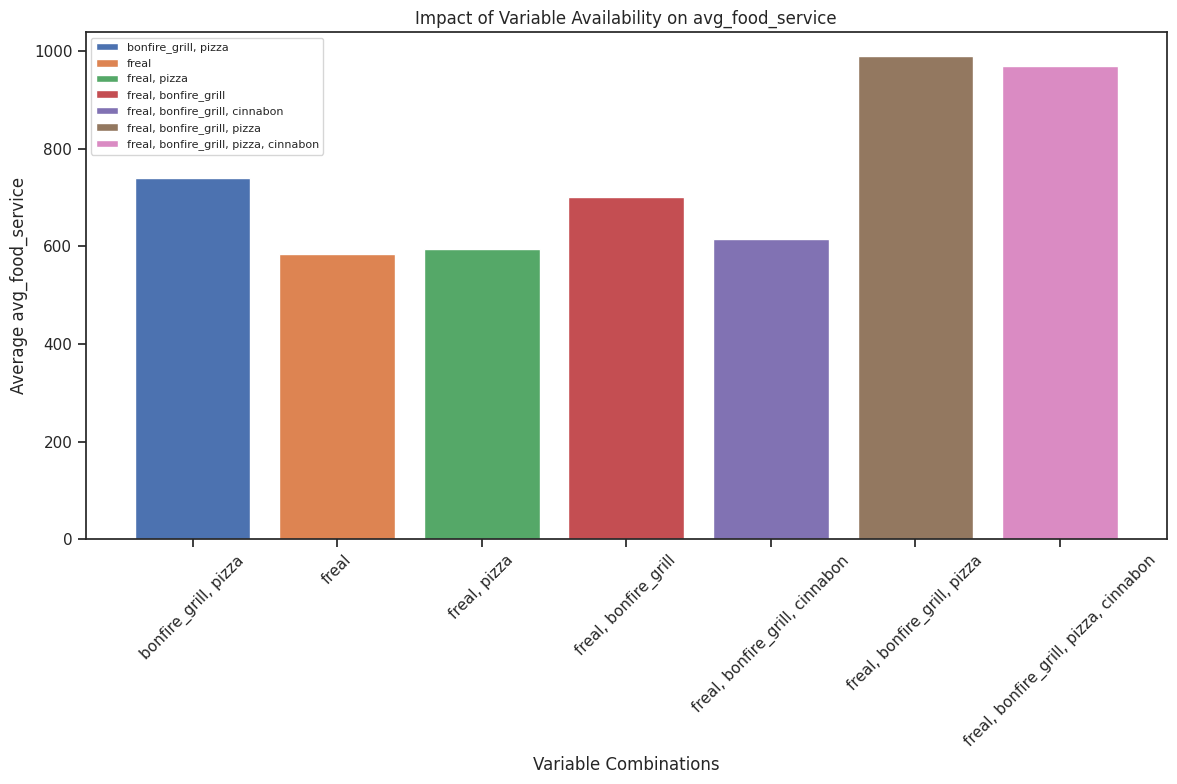

In [ ]:
merged_data_food = merged_data.copy()

# Convert 'Yes' and 'No' to 1 and 0 for the relevant columns
columns_to_convert = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza']
merged_data_food[columns_to_convert] = (merged_data_food[columns_to_convert] == 'Yes').astype(int)

# Group the data and calculate the mean of avg_food_service
grouped_data = merged_data_food.groupby(columns_to_convert)['avg_food_service'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Labels for the legend
x_labels = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza']

combinations = grouped_data[x_labels].drop_duplicates()

for i, row in combinations.iterrows():
    label = ', '.join([x_labels[j] for j in range(len(x_labels)) if row[j] == 1])
    plt.bar(label, grouped_data[(grouped_data[x_labels] == row).all(axis=1)]['avg_food_service'].values[0], label=label)

# Reduce legend box size
plt.legend(loc='upper left', prop={'size': 8})

plt.title('Impact of Variable Availability on avg_food_service')
plt.xlabel('Variable Combinations')
plt.ylabel('Average avg_food_service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

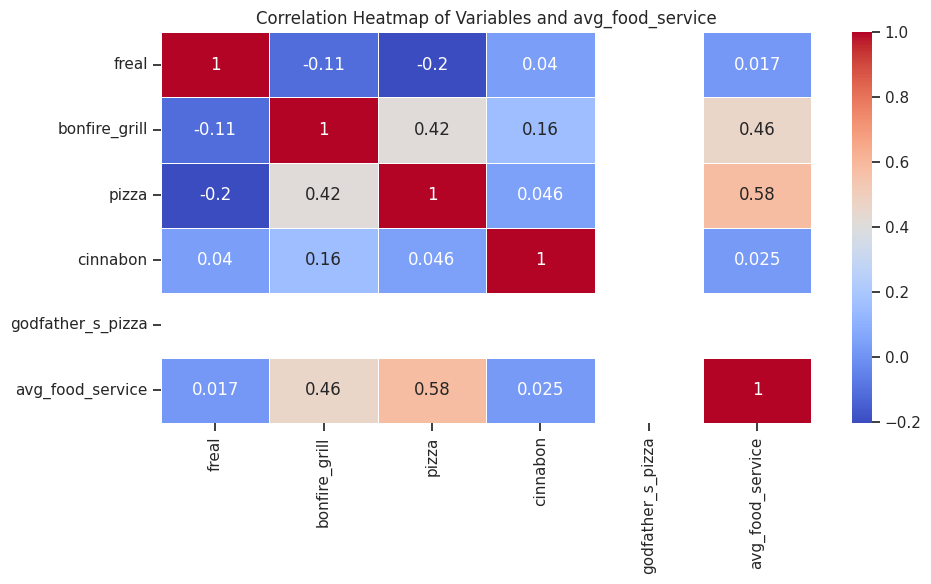

In [ ]:
# Select the columns of interest
columns_to_analyze = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza', 'avg_food_service']

# Subset the data
subset_data = merged_data_food[columns_to_analyze]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables and avg_food_service')
plt.tight_layout()
plt.show()


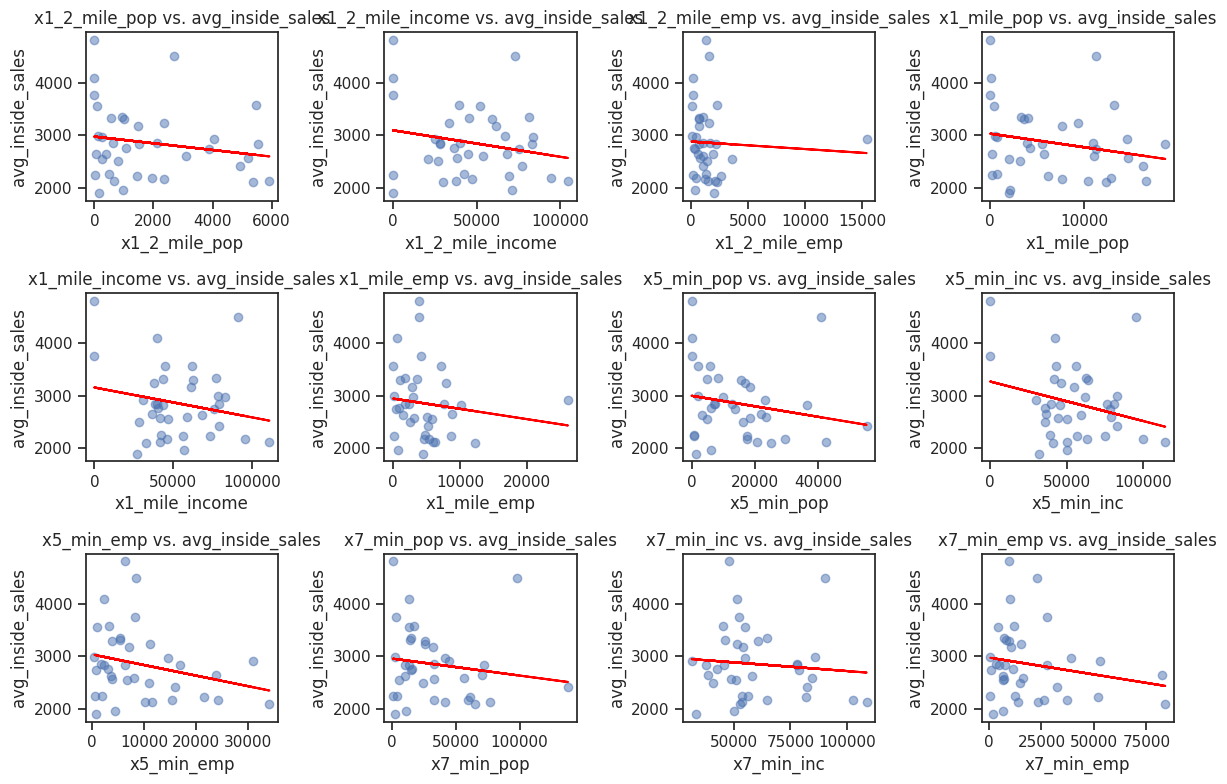

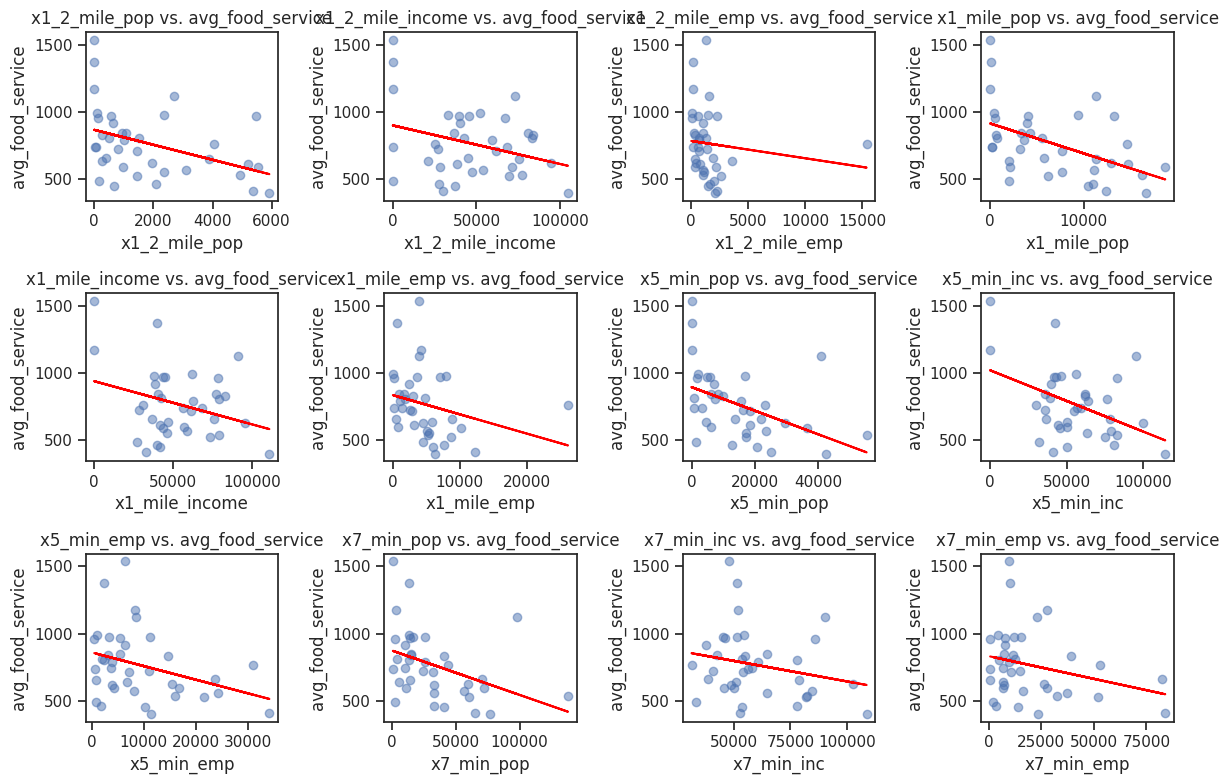

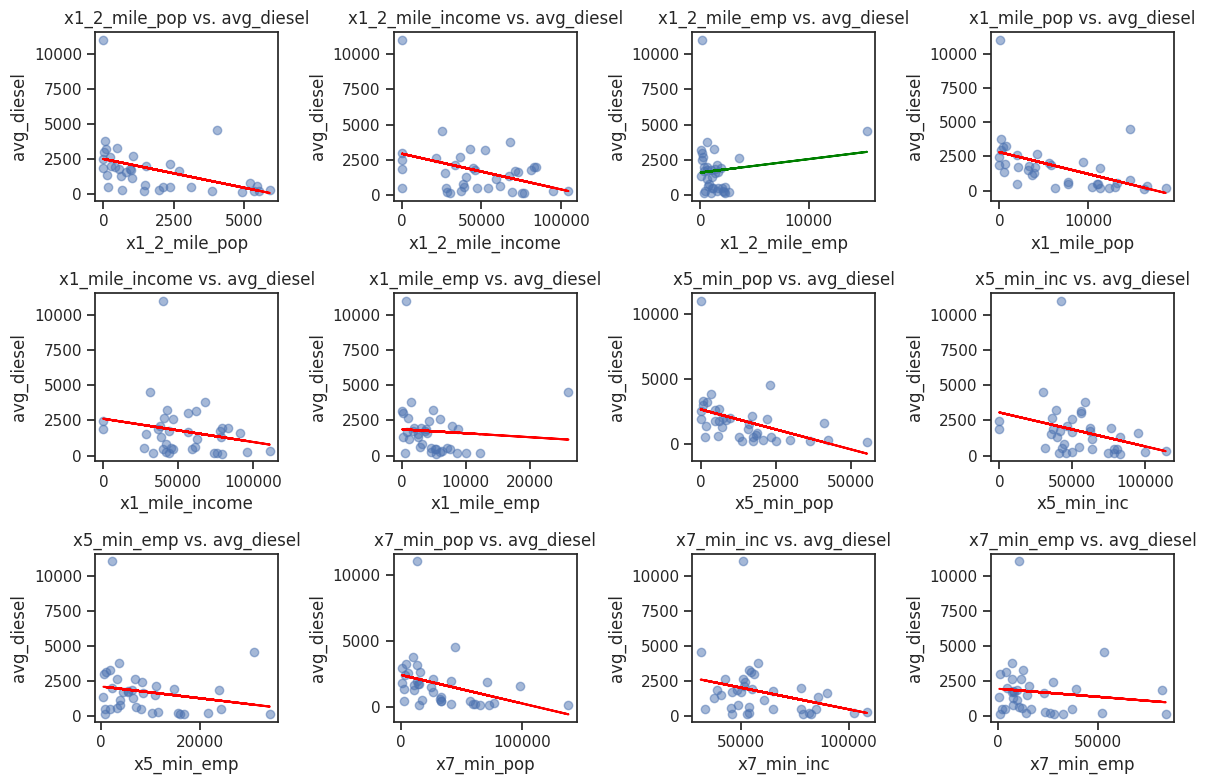

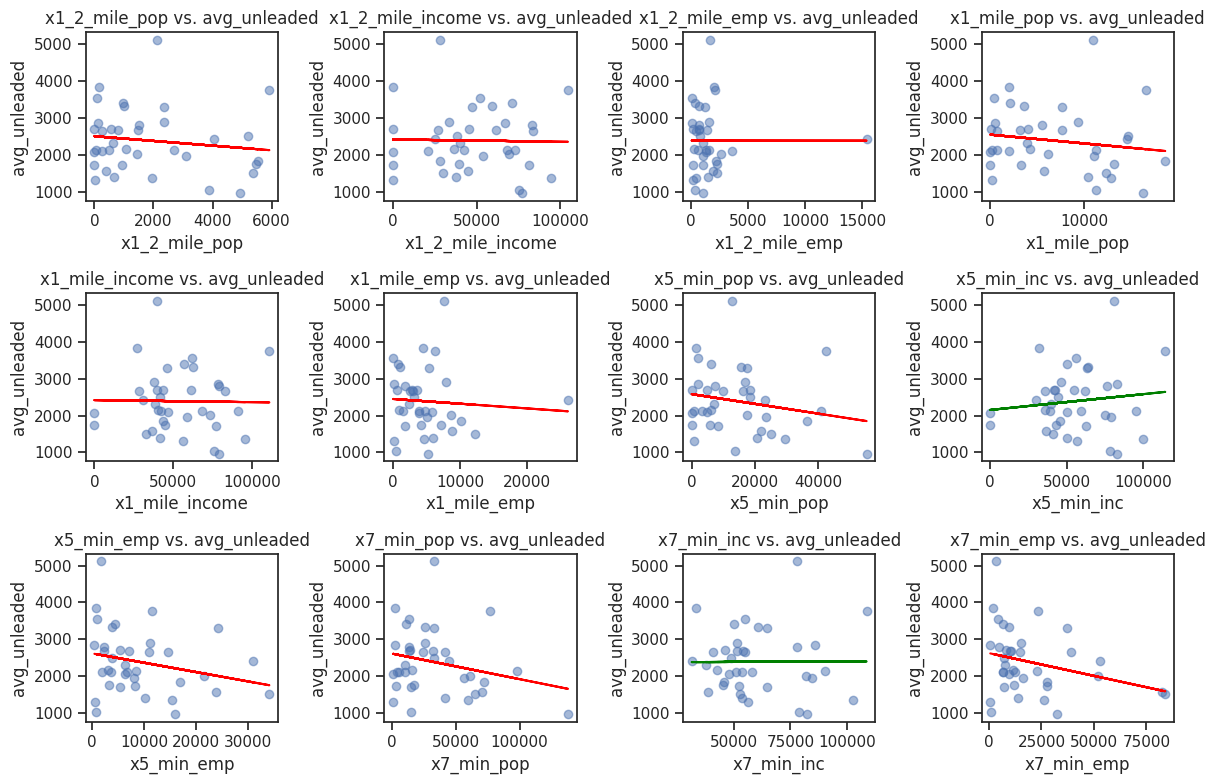

In [ ]:
demographics_columns = ['x1_2_mile_pop', 'x1_2_mile_income', 'x1_2_mile_emp',
                        'x1_mile_pop', 'x1_mile_income', 'x1_mile_emp',
                        'x5_min_pop', 'x5_min_inc', 'x5_min_emp',
                        'x7_min_pop', 'x7_min_inc', 'x7_min_emp']

# Looping through the target variables
for target_variable in ['avg_inside_sales', 'avg_food_service', 'avg_diesel', 'avg_unleaded']:
    plt.figure(figsize=(12, 8))
    for i, demo_column in enumerate(demographics_columns):
        plt.subplot(3, 4, i + 1)

        # Scatter plot
        plt.scatter(merged_data[demo_column], merged_data[target_variable], alpha=0.5)
        plt.xlabel(demo_column)
        plt.ylabel(target_variable)
        plt.title(f'{demo_column} vs. {target_variable}')

        # Calculation of the coefficients of a linear regression model
        x = merged_data[demo_column]
        y = merged_data[target_variable]
        coefficients = np.polyfit(x, y, 1)
        trend_line = np.poly1d(coefficients)

        # The correlation direction (positive or negative)
        correlation_direction = "Positive" if coefficients[0] > 0 else "Negative"

        # Trend line in green for positive correlation and red for negative correlation
        color = 'green' if correlation_direction == "Positive" else 'red'
        plt.plot(x, trend_line(x), color=color)

    plt.tight_layout()
    plt.show()

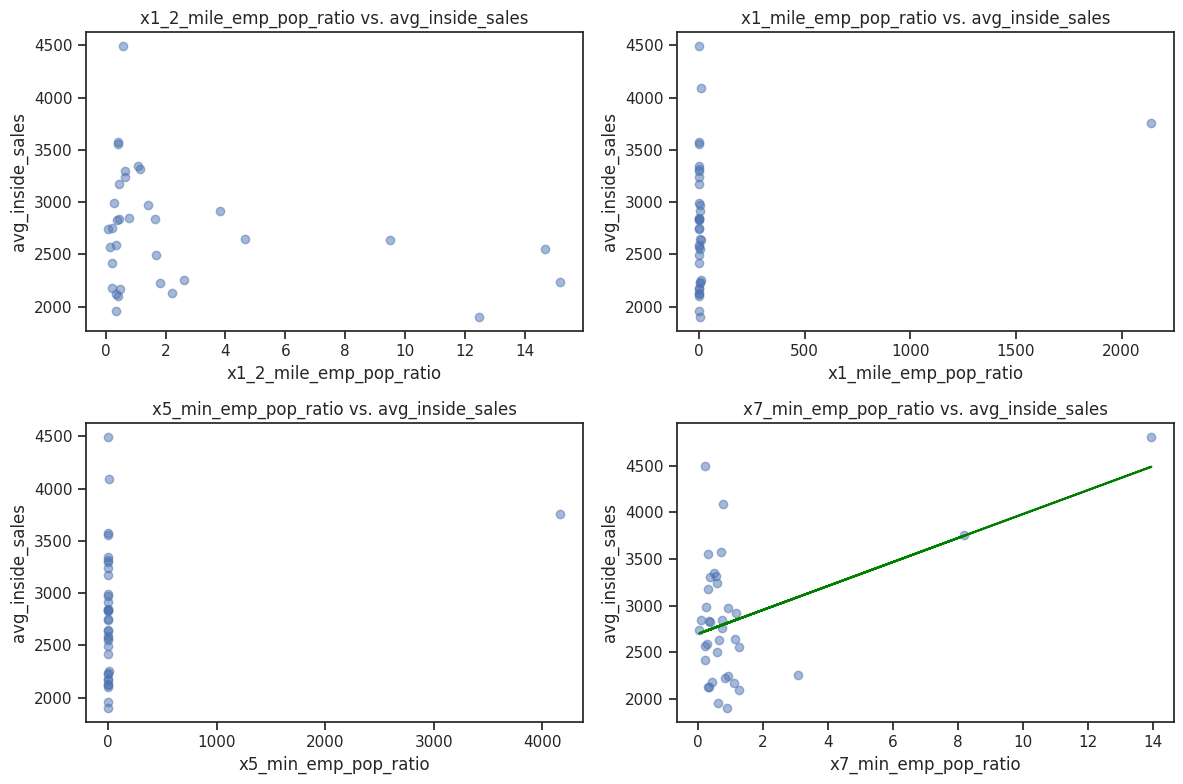

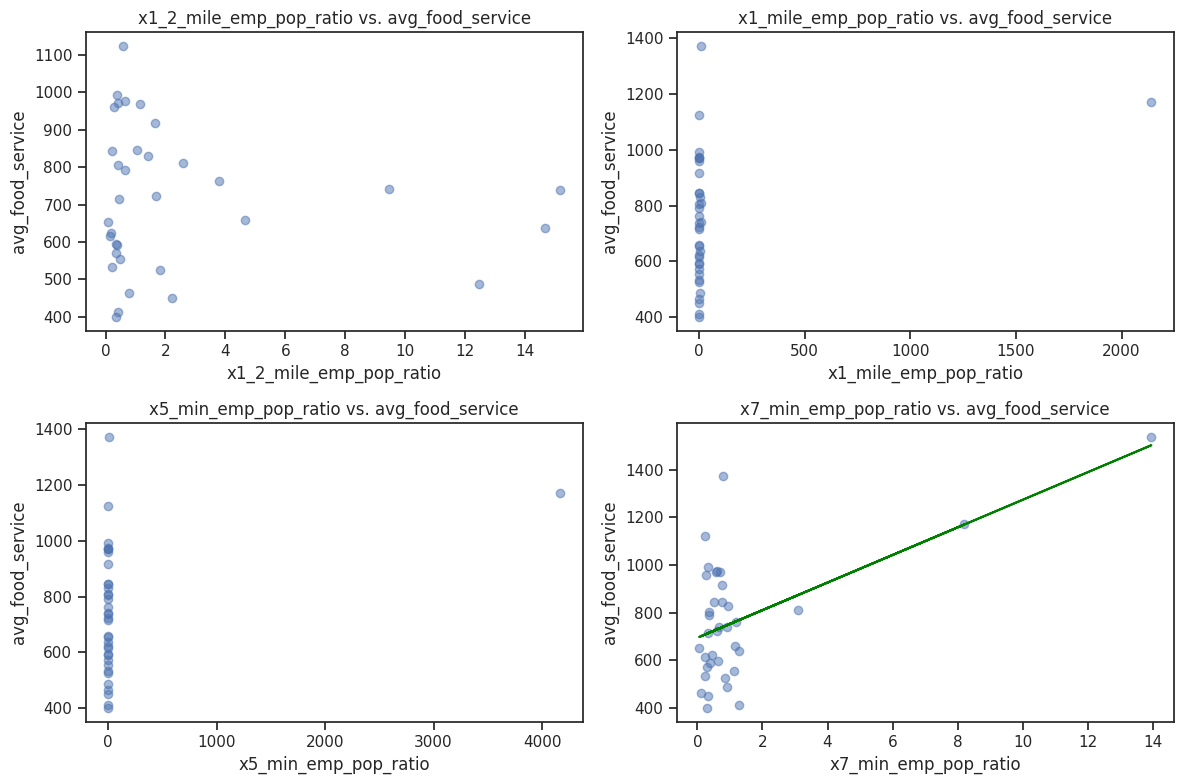

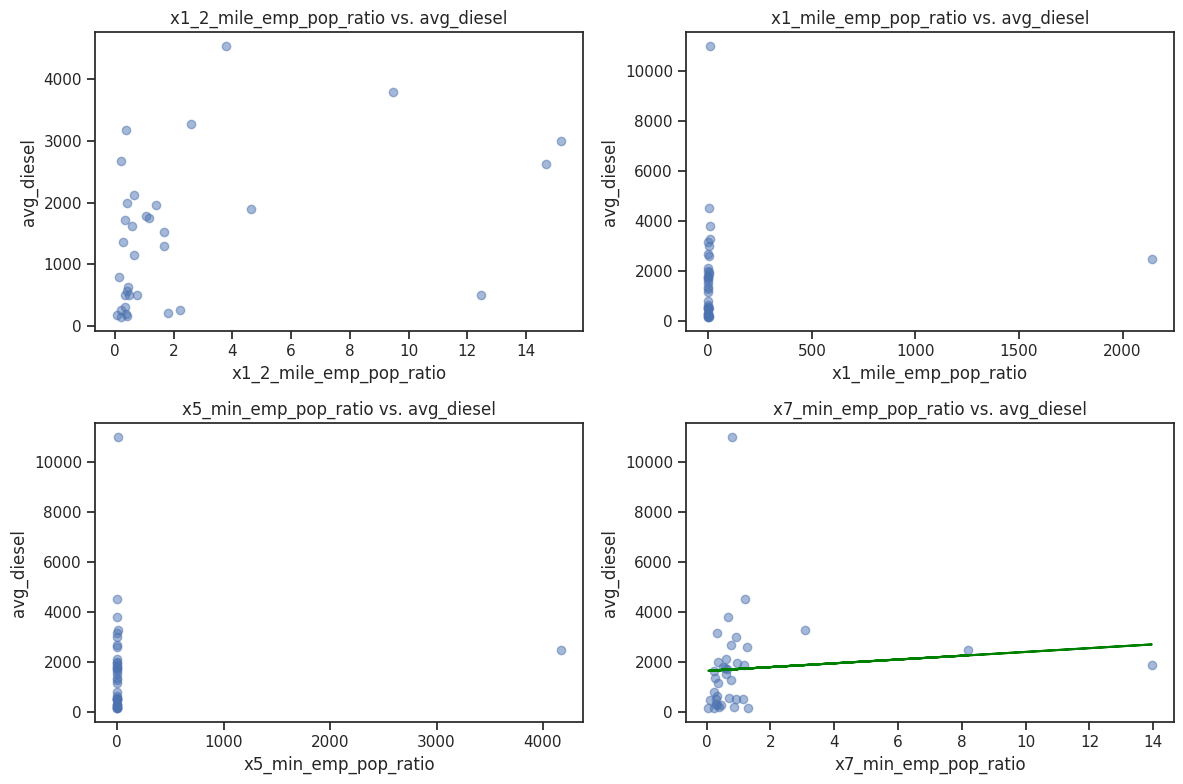

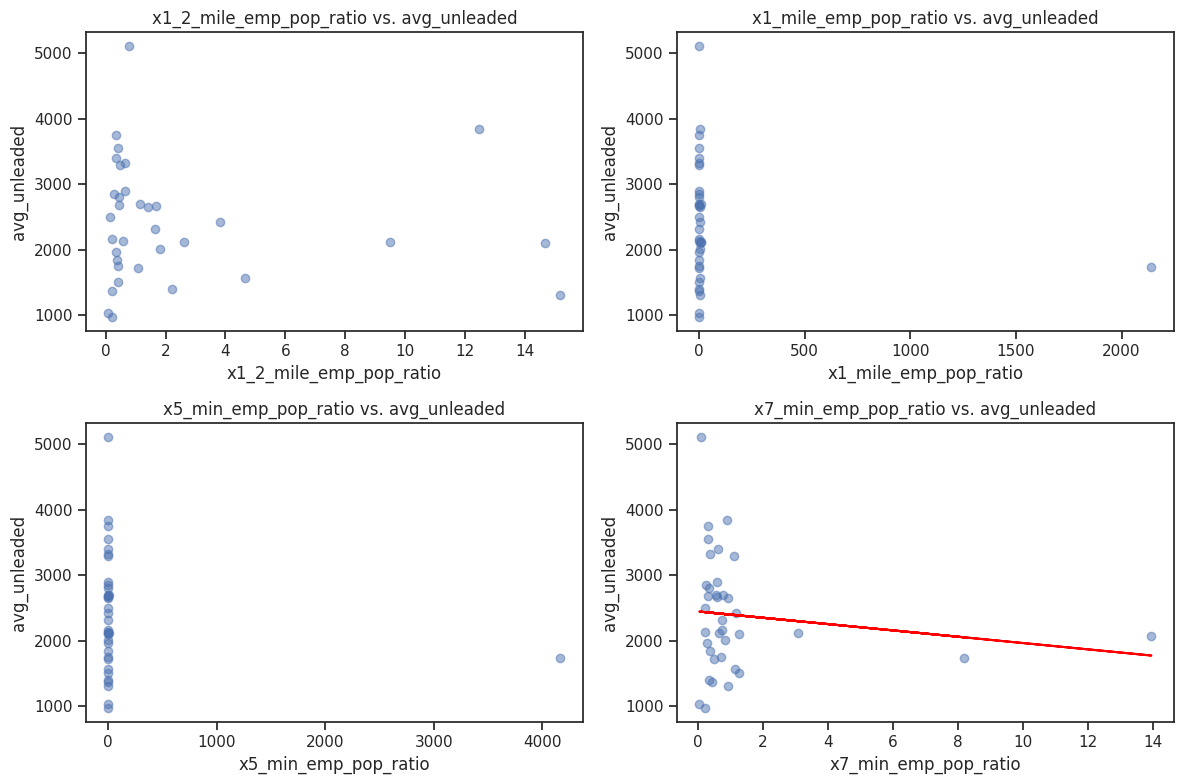

In [ ]:
# Employee-to-population ratios for each radius distance
merged_data['x1_2_mile_emp_pop_ratio'] = merged_data['x1_2_mile_emp'] / merged_data['x1_2_mile_pop']
merged_data['x1_mile_emp_pop_ratio'] = merged_data['x1_mile_emp'] / merged_data['x1_mile_pop']
merged_data['x5_min_emp_pop_ratio'] = merged_data['x5_min_emp'] / merged_data['x5_min_pop']
merged_data['x7_min_emp_pop_ratio'] = merged_data['x7_min_emp'] / merged_data['x7_min_pop']

# Columns of interest
employee_population_ratios = ['x1_2_mile_emp_pop_ratio', 'x1_mile_emp_pop_ratio',
                              'x5_min_emp_pop_ratio', 'x7_min_emp_pop_ratio']

# Looping through the target variables
for target_variable in ['avg_inside_sales', 'avg_food_service', 'avg_diesel', 'avg_unleaded']:
    plt.figure(figsize=(12, 8))
    for i, emp_pop_ratio_column in enumerate(employee_population_ratios):
        plt.subplot(2, 2, i + 1)

        # Scatter plot for the current employee-to-population ratio vs. the target variable
        plt.scatter(merged_data[emp_pop_ratio_column], merged_data[target_variable], alpha=0.5)
        plt.xlabel(emp_pop_ratio_column)
        plt.ylabel(target_variable)
        plt.title(f'{emp_pop_ratio_column} vs. {target_variable}')

        # Linear regression statistics
        x = merged_data[emp_pop_ratio_column]
        y = merged_data[target_variable]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Correlation direction (positive or negative)
        correlation_direction = "Positive" if slope > 0 else "Negative"

        # Trend line in green for positive correlation and red for negative correlation
        if correlation_direction == "Positive":
            color = 'green'
        else:
            color = 'red'

        # Plotting the regression line
        plt.plot(x, slope * x + intercept, color=color)

    plt.tight_layout()
    plt.show()